<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Unsupervised_Captsone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch

import scipy.cluster.hierarchy as shc


Read the dataset <br>
Dataset Name: CC GENERAL.csv

In [5]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Drop the customer id feature as it is a Nominal categorial feature

In [6]:
df=df.drop('CUST_ID', axis = 1)

In [7]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Analysize the data using info() and describe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Observations:<br>
1. The dataset has 17 features and 8950 datapoints/observations.<br>
2. Minumum payments and credit limit featues have a null value.

Analyse the Credit Limit Feature

<Axes: >

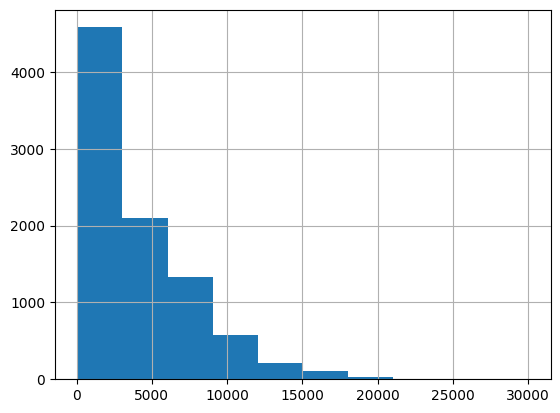

In [11]:
df['CREDIT_LIMIT'].hist()

In [12]:
median_credit_limit = df['CREDIT_LIMIT'].median()

Fill the credit limit with the median value

In [13]:
df['CREDIT_LIMIT'].fillna(value = median_credit_limit, inplace = True)

Analyse the MINIMUM_PAYMENTS feature

<Axes: >

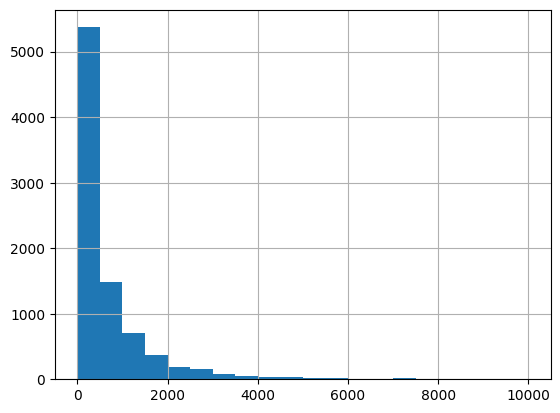

In [14]:
df['MINIMUM_PAYMENTS'].hist(bins=20,range = [0,10_000])

In [15]:
min_payments_median = df['MINIMUM_PAYMENTS'].median()
min_payments_mean = df['MINIMUM_PAYMENTS'].mean()
print(f'Mean:{min_payments_mean}')
print(f'Median:{min_payments_median}')

Mean:864.2065423050828
Median:312.343947


Fill the missing Minumum payments with the median

In [16]:
df['MINIMUM_PAYMENTS'].fillna(value=min_payments_mean, inplace=True)

Validate the data again for the presense of null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [18]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Scaling the data to the standard form

In [47]:
st = StandardScaler()

In [48]:
df_scaled = st.fit_transform(df)

In [49]:
total_components = df_scaled.shape[1]

In [50]:
pca = PCA(n_components= total_components)
X_pca = pca.fit_transform(df_scaled)

Set x values for plotting Scree plot

In [51]:
pca.explained_variance_

array([4.63987130e+00, 3.45173551e+00, 1.49478337e+00, 1.27175892e+00,
       1.06478417e+00, 9.77734310e-01, 8.30840766e-01, 7.23807229e-01,
       6.50976547e-01, 5.23653720e-01, 4.03266558e-01, 3.01548898e-01,
       2.42521409e-01, 2.06976872e-01, 1.72227430e-01, 4.54009923e-02,
       1.16501009e-05])

In [52]:
pc_values = np.arange(1,pca.n_components_ + 1)

Text(0, 0.5, 'Variance Explained')

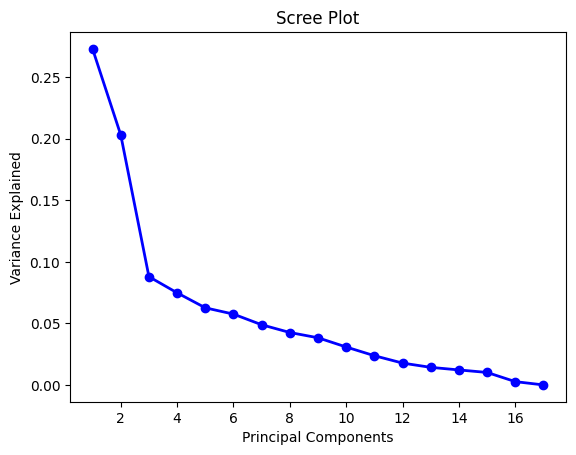

In [53]:
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = 'blue' )
plt.title("Scree Plot")
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')

In [30]:
pca.explained_variance_ratio_

array([2.72903111e-01, 2.03020579e-01, 8.79186088e-02, 7.48009899e-02,
       6.26273645e-02, 5.75073568e-02, 4.88675255e-02, 4.25721387e-02,
       3.82884595e-02, 3.07997183e-02, 2.37189118e-02, 1.77361886e-02,
       1.42643712e-02, 1.21737498e-02, 1.01298934e-02, 2.67034821e-03,
       6.85223486e-07])

Calculate the cumulative explained variance from the explained variance using numpy

In [54]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance_ratio

array([0.27290311, 0.47592369, 0.5638423 , 0.63864329, 0.70127065,
       0.75877801, 0.80764554, 0.85021767, 0.88850613, 0.91930585,
       0.94302476, 0.96076095, 0.97502532, 0.98719907, 0.99732897,
       0.99999931, 1.        ])

Plot the cumulative variance over the number of principal components (blue) and a horizontal line showing 85% of cumulative variance.

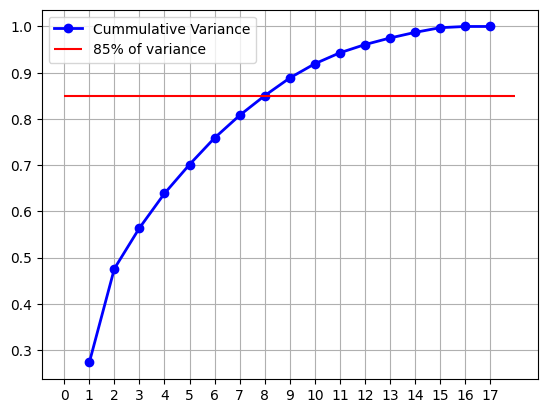

In [55]:
plt.plot(pc_values, cumulative_variance_ratio, 'o-',
         linewidth=2,color='blue', label = 'Cummulative Variance')

plt.hlines(y = .85, color = 'red', xmin = -0, xmax = 18, label = '85% of variance')

#plt.xlim(0,18)
plt.xticks(ticks = np.arange(0,18,1))
plt.legend()
plt.grid()

Checking the eigen values

convert the scaled numpy array into a data frame

In [56]:
df_scaled_df = pd.DataFrame(df_scaled)

In [40]:
eigenvalues,eigenvectos = np.linalg.eig(df_scaled_df.cov().T)

In [41]:
eigenvalues

array([4.63987130e+00, 3.45173551e+00, 1.49478337e+00, 1.27175892e+00,
       1.06478417e+00, 9.77734310e-01, 8.30840766e-01, 7.23807229e-01,
       6.50976547e-01, 5.23653720e-01, 4.03266558e-01, 3.01548898e-01,
       2.42521409e-01, 1.72227430e-01, 2.06976872e-01, 4.54009923e-02,
       1.16501009e-05])

The Kaizer criteria tells us that we may go with 5 PC's to make sure that we are abel to capture the most optimal variation in the dataset.

Going with 2 PC's as it is easy to visualize in a 2 dimentional coordinate system.

In [57]:
pca_w2pc = PCA(n_components = 2)
X_w2pc = pca_w2pc.fit_transform(df_scaled)


Each row in principal_components represents a single principal component.<br>
The values in each row indicate the contribution of each original feature to that specific PC.<br>
Analyzing these values can help you understand the linear combinations that form the PCs and how the original features contribute to capturing the variance in the data.

In [59]:
comp = pd.DataFrame(pca_w2pc.components_,columns=df.columns)
comp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.101087,0.120052,0.411638,0.346404,0.336811,-0.023334,0.321489,0.294631,0.274705,-0.089131,-0.048646,0.390691,0.211693,0.266252,0.060355,0.132109,0.081031
1,0.403956,0.130546,0.041023,0.062858,-0.018544,0.439241,-0.190786,-0.017932,-0.178606,0.434083,0.419735,-0.019407,0.238678,0.257466,0.166969,-0.190028,-0.004311


**Clustering - using KNN** <br>
Identifying how many clusters we need using the elbow method for the data set craeted from 2pc reduction

In [61]:
wcss = []
for i in range(2,12):
  model = KMeans(n_clusters = i,n_init = 200, random_state =42)
  model.fit(X_w2pc)
  wcss.append(model.inertia_)

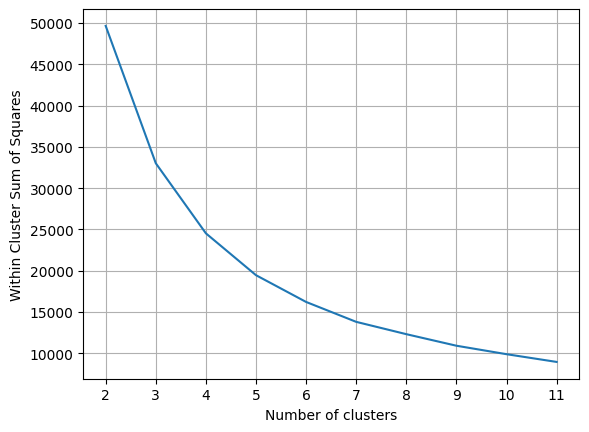

In [66]:
plt.plot(range(2, 12), wcss)
plt.xticks(ticks = np.arange(2,12,1))
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid()

Number of clusters appears to be 3

Try Dendogram method

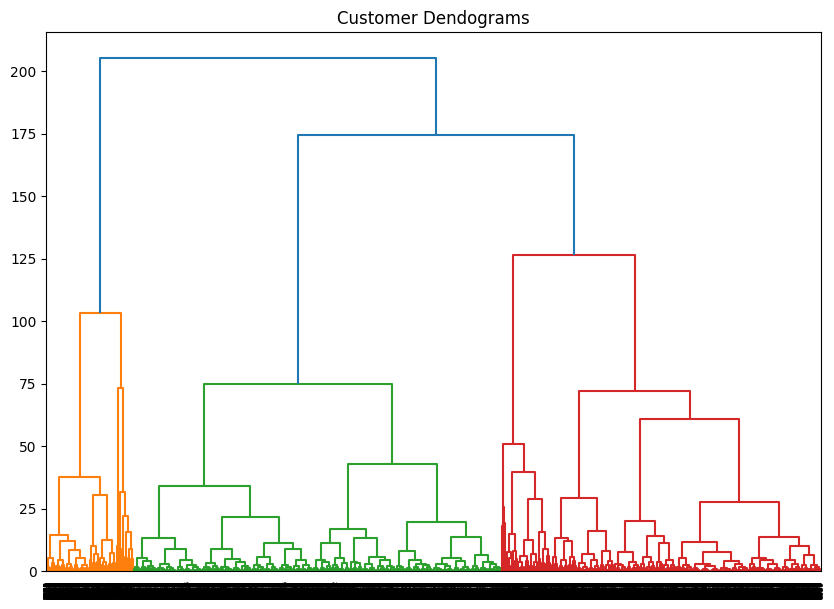

In [67]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_w2pc,method='ward'))

Optimal number of clusters appears to be 3

In [69]:
model = KMeans(n_clusters=3,n_init='auto')
clusters = model.fit_predict(X_w2pc)

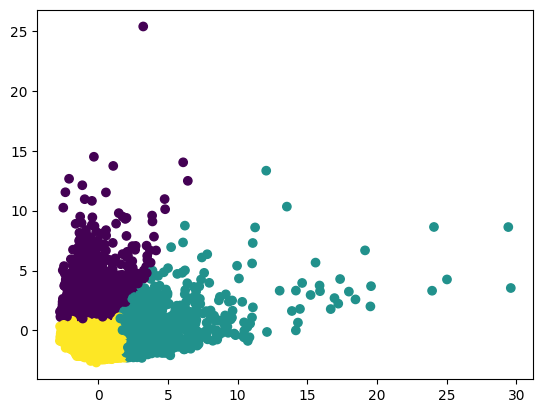

In [70]:
plt.scatter(X_w2pc[:,0],X_w2pc[:,1],c=clusters)